#Libraries Import

In [ ]:
import numpy as np   #Used for numerical computation
import pandas as pd  #Handle our Dataset
 
#Libraries for machine learning
from sklearn.preprocessing import StandardScaler #Data Standardization
from sklearn.cluster import KMeans    #K-means clustering
from sklearn.decomposition import PCA #Principal Component Decomposition
#model performance evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

#Used to load files to google colab
from google.colab import files


#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##Dataset Loading

In [ ]:
#Upload training and test dataset to colab environment
files.upload()

#Read training dataset
df_train = pd.read_csv ('dataset.xls')

#Have a look at the training dataset
df_train.head()

Saving train.xls to train.xls


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


#Data Cleaning
##Remove Unnecessary Columns

In [ ]:
#Removing unnecessary columns from the data
df_train = df_train.drop(['id'], axis=1)
df_train = df_train.drop(['target'], axis=1)

##Fill Missing Values

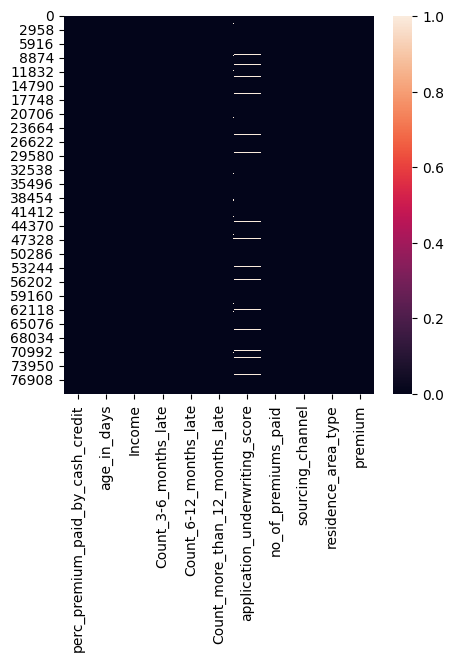

In [ ]:
#Creating a heat map to see which columns have missing points
plt.figure(figsize=(5,5),dpi=100)  #Empty figure
sns.heatmap(df_train.isnull());

As visible from the heat map, there are missing values in Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late and application_underwriting_score. We would insert the average of the columns into them.

In [ ]:
#Filling NA values with average in the following columns
df_train['Count_3-6_months_late'].fillna(value=df_train['Count_3-6_months_late'].mean(), inplace=True)
df_train['Count_6-12_months_late'].fillna(value=df_train['Count_6-12_months_late'].mean(), inplace=True)
df_train['Count_more_than_12_months_late'].fillna(value=df_train['Count_more_than_12_months_late'].mean(), inplace=True)
df_train['application_underwriting_score'].fillna(value=df_train['application_underwriting_score'].mean(), inplace=True)

##Encode Categorical Columns

In [ ]:
#Converting Categorical Columns with Numerics
print("Categories in sourcing_channel: ", df_train['sourcing_channel'].unique())
print("Categories in residence_area_type: ", df_train['residence_area_type'].unique())

Categories in sourcing_channel:  ['C' 'A' 'B' 'D' 'E']
Categories in residence_area_type:  ['Urban' 'Rural']


Since the sourcing_channel columns have A, B, C, D, E categories, we will encode them as 0, 1, 2, 3. Similarly residence_area_type has two categories i.e Urban and Rural, we will encode them as 0 and 1 respectively.

In [ ]:
#Store the keys for each category
residence_area= {'Urban':0, 'Rural':1}  #Area type
source_channel= {'C':0, 'A':1, 'B':2, 'D':3, 'E':4}  #Sourcing channel
#Replace the categorical data with the keys
df_train['residence_area_type']= df_train['residence_area_type'].map(residence_area)
df_train['sourcing_channel']= df_train['sourcing_channel'].map(source_channel)

##Remove Outliers

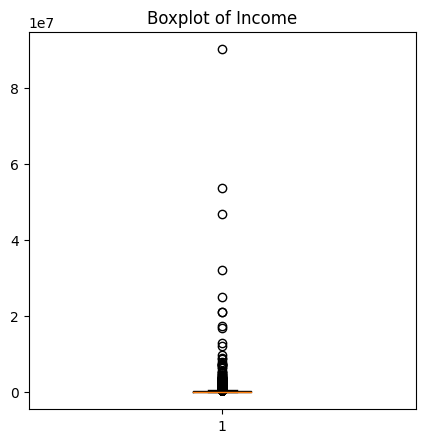

In [ ]:
#Lets create a boxplot of the Income column
plt.figure(figsize=(5,5),dpi=100)
plt.boxplot(df_train['Income'])
plt.title('Boxplot of Income');

As evident from the box plot, the Income has some outliers that needs to be dealt with.

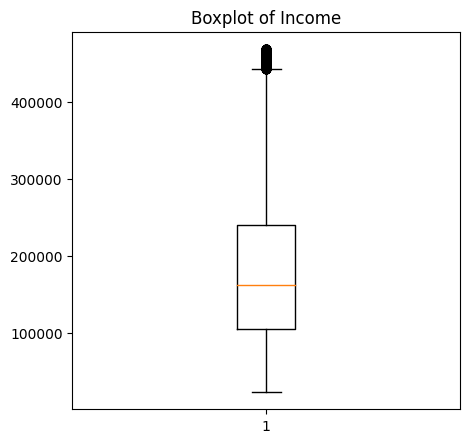

In [ ]:
#Removing the outliers from training set using IQR technique

#Finding 25th, 50th and 75th percentile
Q1=np.percentile(df_train['Income'],25,interpolation='midpoint')
Q2=np.percentile(df_train['Income'],50,interpolation='midpoint')
Q3=np.percentile(df_train['Income'],75,interpolation='midpoint')

#IQR value
IQR=Q3-Q1

#Setting upper and lower limits
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3+1.5*IQR

#Variable to store outliers
outlier=[]

#Removing values that are outside the range
for x in df_train['Income']:
    if((x>upper_limit)or(x<lower_limit)):
        outlier.append(x)
outlier_index=df_train['Income']>upper_limit
df_train.drop(df_train.loc[outlier_index].index,inplace=True)

#Lets create a boxplot of the Income column again
plt.figure(figsize=(5,5),dpi=100) #empty figure
plt.boxplot(df_train['Income'])
plt.title('Boxplot of Income');

As evident from the boxplot, the outliers are removed from the dataset.

##Data Visualization

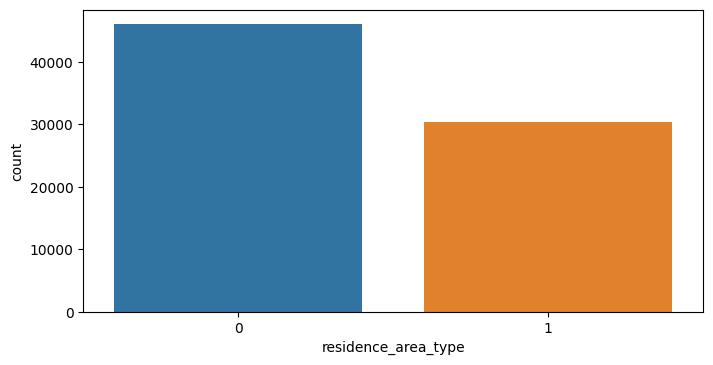

In [ ]:
#Area wise customers distribution
plt.figure(figsize=(8,4),dpi=100)  #Empty figure
#Area wise distribution using countplot in seaborn
sns.countplot(df_train['residence_area_type']);

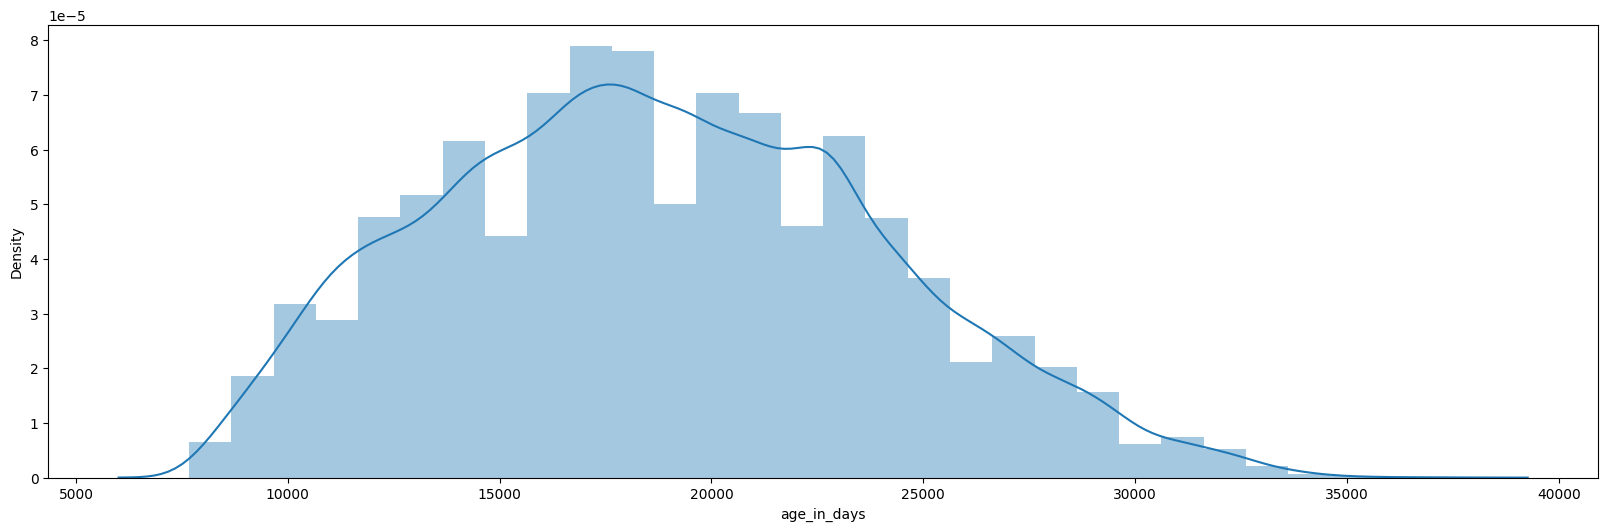

In [ ]:
#Customers Age Distribution
plt.figure(figsize=(20,6),dpi=100) #Empty figure
#Age Distribution plot
sns.distplot(df_train['age_in_days'], bins=30);

Text(0.5, 1.0, 'Scatter plot between Age and Application Score')

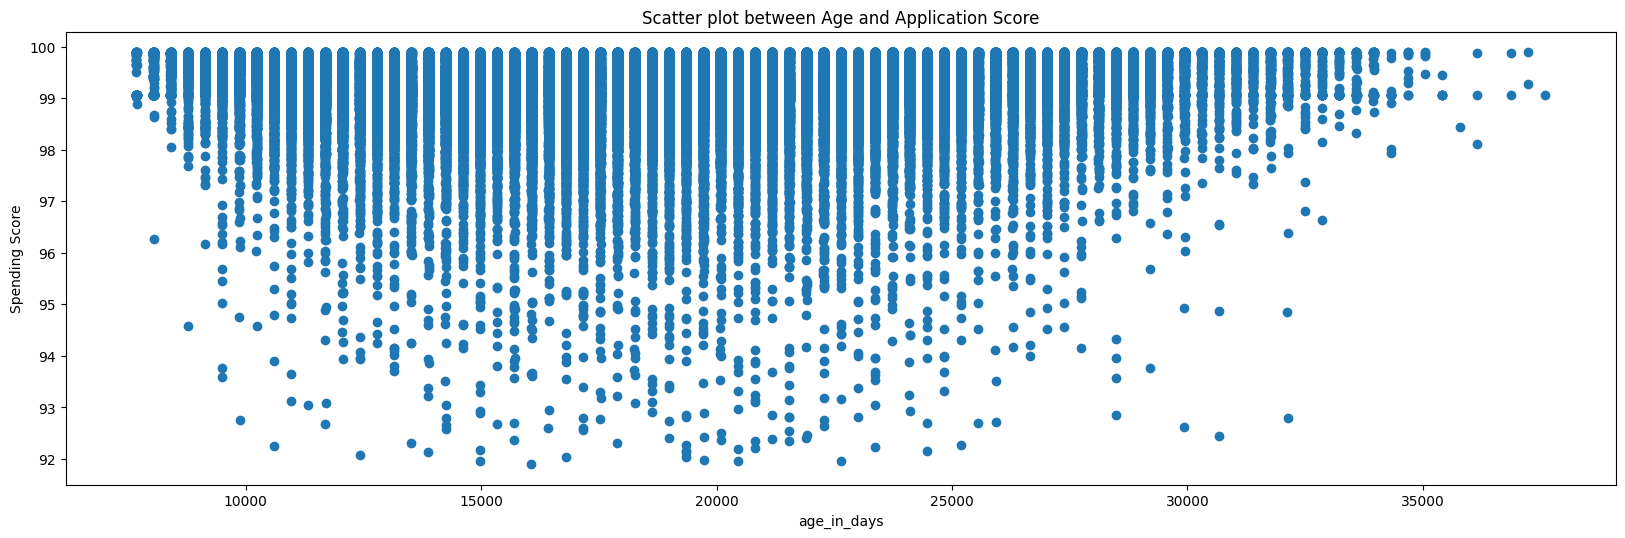

In [ ]:
#Age and Application underwriting Score
plt.figure(figsize=(20,6),dpi=100)  #Empty figure

#Scatter plot
plt.scatter(df_train['age_in_days'],df_train['application_underwriting_score'], marker='o');
#Labeling the figure
plt.xlabel('age_in_days')
plt.ylabel('Spending Score')
plt.title('Scatter plot between Age and Application Score')

Text(0.5, 1.0, 'Scatter plot between Age and Income')

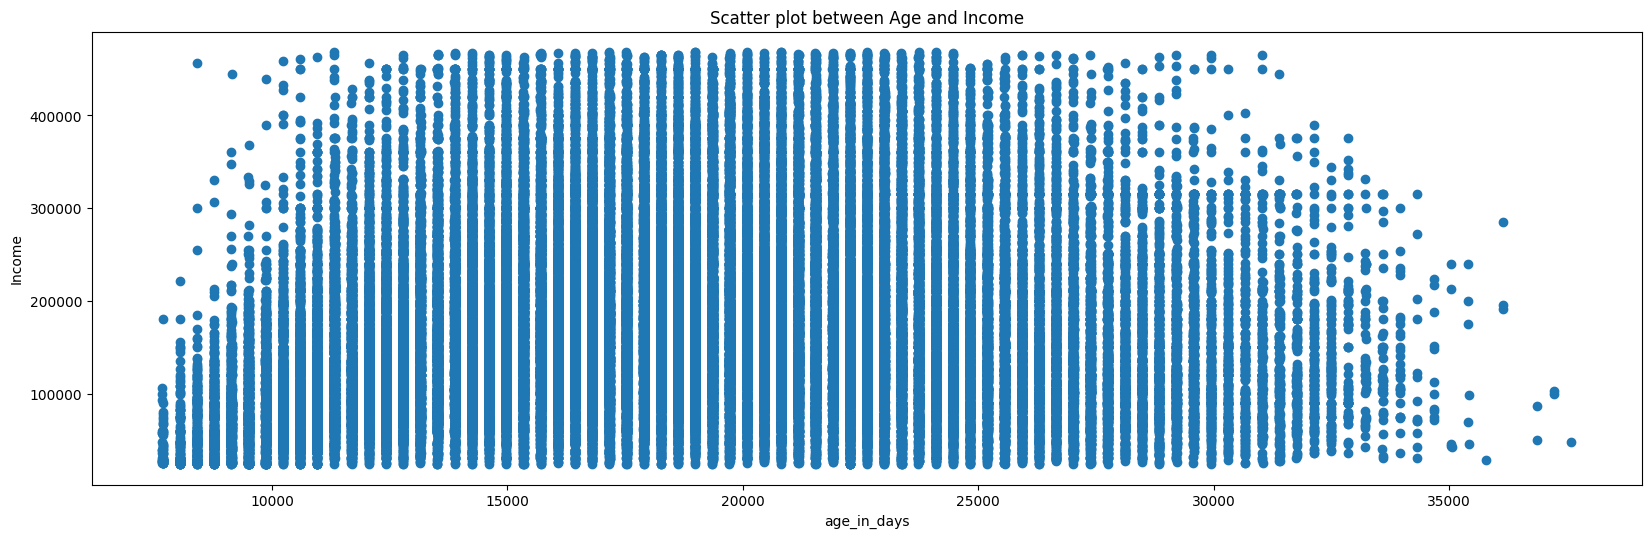

In [ ]:
#Scatter plot of Age vs Income
plt.figure(figsize=(20,6), dpi=100)  #Empty figure

#Scatter plot
plt.scatter(df_train['age_in_days'],df_train['Income'], marker='o');
#Labeling the figure
plt.xlabel('age_in_days')
plt.ylabel('Income')
plt.title('Scatter plot between Age and Income')

Text(0.5, 1.0, 'Scatter plot between Income and Application Underwriting Score')

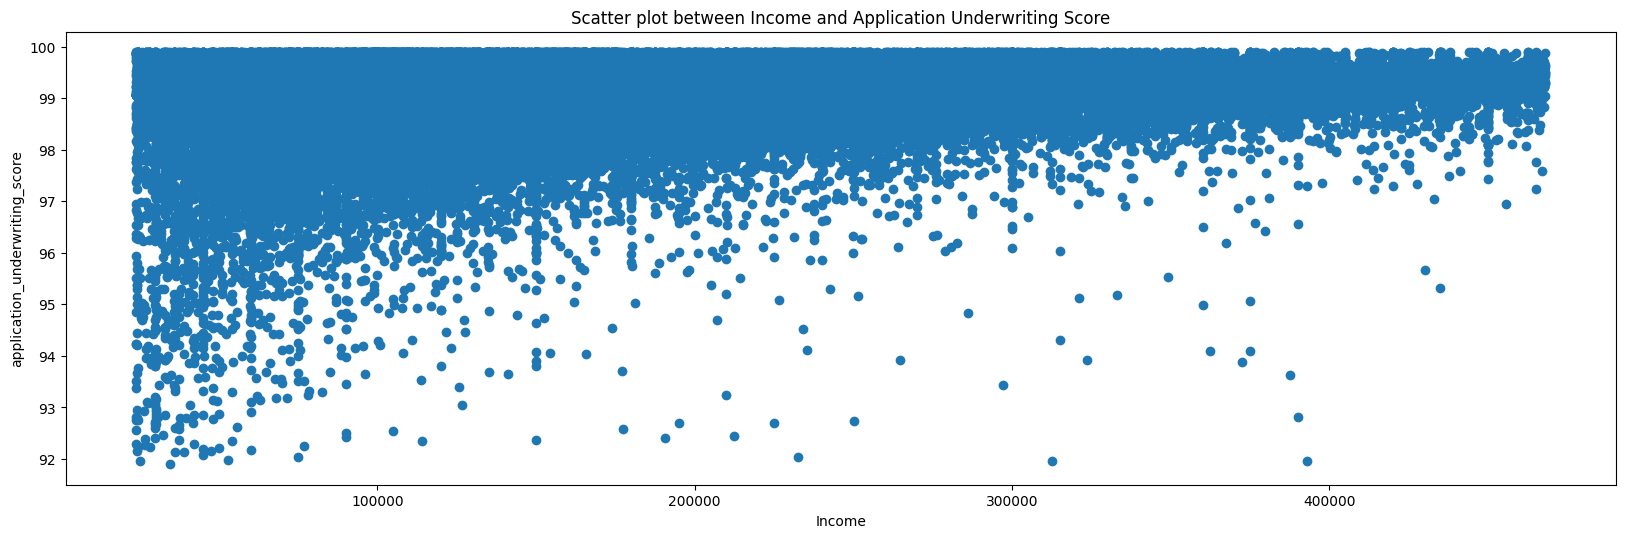

In [ ]:
#Scatter plot between Income and Application Score
plt.figure(figsize=(20,6), dpi=100) #Empty figure

#Scatter plot
plt.scatter(df_train['Income'],df_train['application_underwriting_score'], marker='o');
#Labeling the figure
plt.xlabel('Income')
plt.ylabel('application_underwriting_score')
plt.title('Scatter plot between Income and Application Underwriting Score')

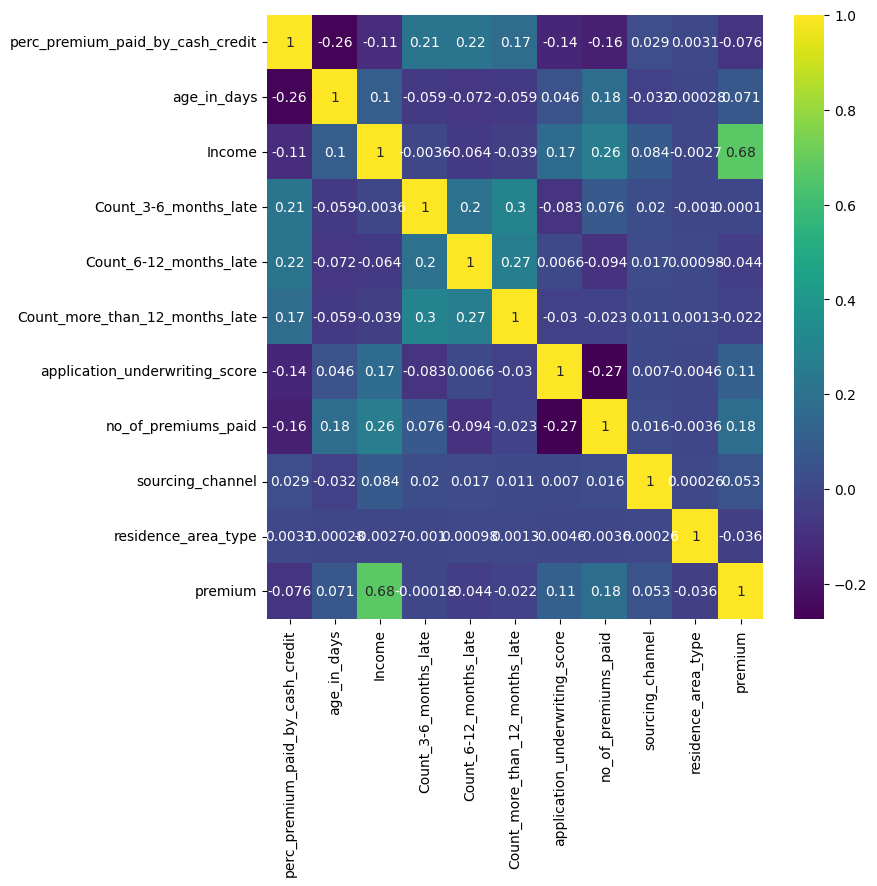

In [ ]:
#Correlation between features 
fig, ax = plt.subplots(figsize=(8,8), dpi=100) #Create empty plot

#Create a heatmap using seaborn
sns.heatmap(df_train.corr(), annot=True, cmap='viridis');

#Data Clustering
##Data Standardization

In [ ]:
#Standard Scaler
scaler = StandardScaler()

#Get Column names from the data
col_names = df_train.columns

#Scale the dataset
features = scaler.fit_transform(df_train)

#Store the scaled dataset in dataframe
df_train = pd.DataFrame(features, columns = col_names)

##Elbow Method to find Optimal K

Text(0, 0.5, 'Inertia')

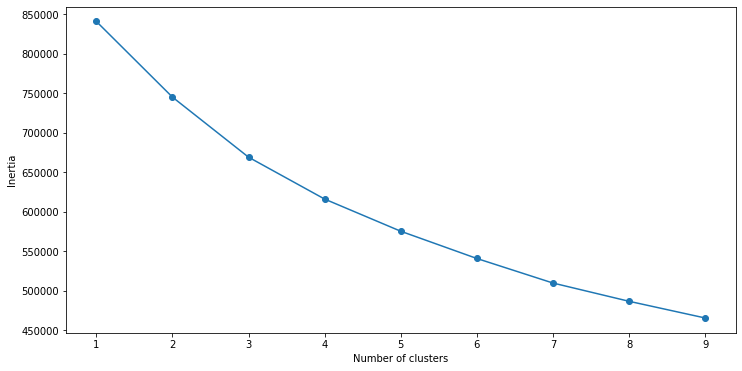

In [ ]:
#Variable to store the inertia values for each k
SSE = []
#Iterating over different k values
for cluster in range(1,10):
    #Fitting the k means algorithm
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_train)
    #Calculating and storing the inertia
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

##K-Means Clustering

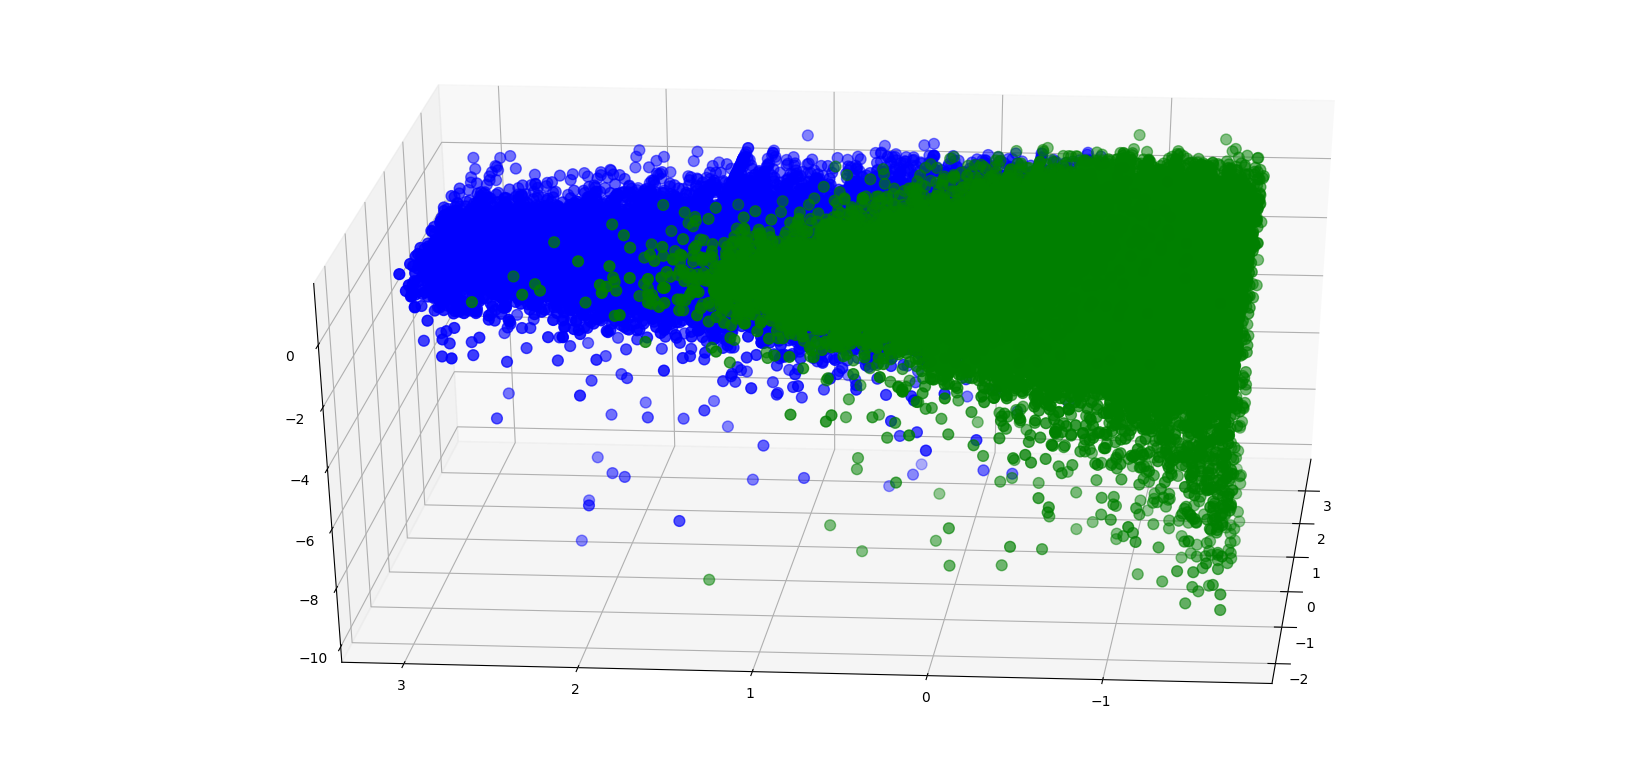

The silhouette score of the cluster is:  0.14550715686716426


In [ ]:
#Number of clusters
n_clusters = 2

#K-means class declaration
kmeans = KMeans(n_clusters)

#Model training
clusters = kmeans.fit_predict(df_train)

#Adding the assigned clusters to the training data frame
df_train["cluster_pred"] = clusters

#Plotting the clusters
fig = plt.figure(figsize=(21,10), dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train.age_in_days[df_train.cluster_pred == 0], df_train["Income"][df_train.cluster_pred == 0], df_train["application_underwriting_score"][df_train.cluster_pred == 0], c='blue', s=60)
ax.scatter(df_train.age_in_days[df_train.cluster_pred == 1], df_train["Income"][df_train.cluster_pred == 1], df_train["application_underwriting_score"][df_train.cluster_pred == 1], c='green', s=60)

ax.view_init(30, 185)
plt.show()

#Print the silhouette score of the cluster
print("The silhouette score of the cluster is: ", silhouette_score(df_train, kmeans.labels_, metric='euclidean'))



##Principal Component Analysis

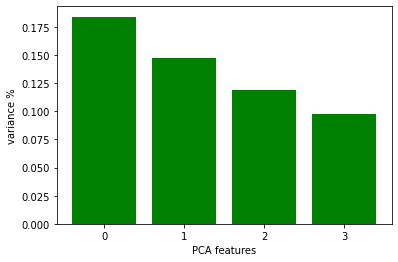

In [ ]:
#Remove the clusters assigned by the previous model
df_train = df_train.drop(['cluster_pred'],axis=1)

#Perform PCA with reducing the data to 4-D
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df_train)

#Plotting the features variance
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

#Create a dataframe of the features
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'Inertia')

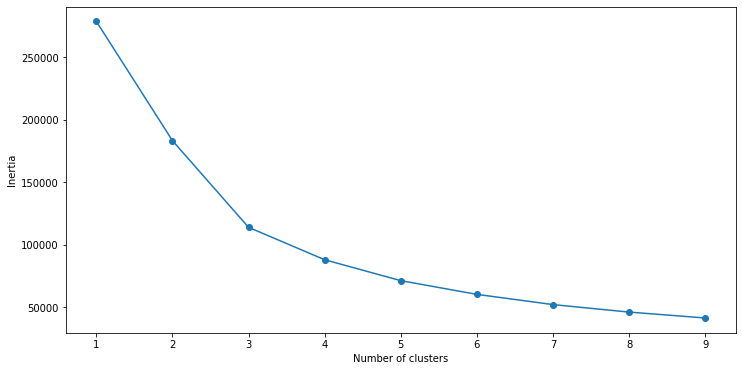

In [ ]:
#Variable to store the inertia values for each k
SSE = []
#Iterating over different k values
for cluster in range(1,10):
    #Fitting the k means algorithm
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(PCA_components.iloc[:,:2])
    #Calculating and storing the inertia
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

##K-means after applying PCA

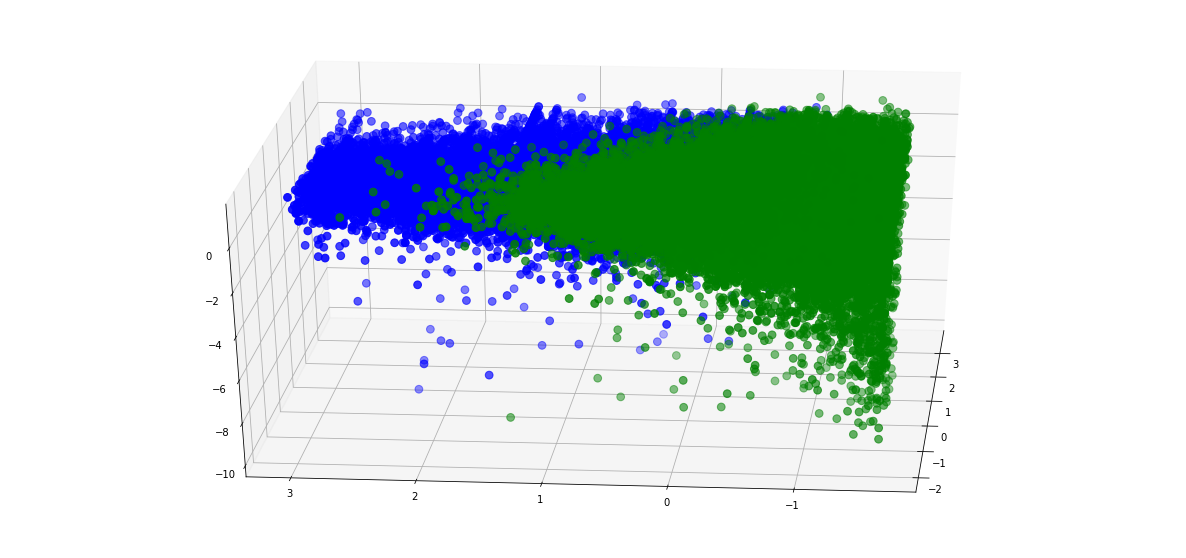

In [ ]:
#Declaring second model
model_2 = KMeans(n_clusters=n_clusters)

#Model training
clusters = model_2.fit_predict(PCA_components.iloc[:,:2])

#Adding cluster column to data
df_train["cluster_pred"] = clusters

#Plotting the clusters
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train.age_in_days[df_train.cluster_pred == 0], df_train["Income"][df_train.cluster_pred == 0], df_train["application_underwriting_score"][df_train.cluster_pred == 0], c='green', s=60)
ax.scatter(df_train.age_in_days[df_train.cluster_pred == 1], df_train["Income"][df_train.cluster_pred == 1], df_train["application_underwriting_score"][df_train.cluster_pred == 1], c='blue', s=60)

ax.view_init(30, 185)
plt.show()

##Silhouette Analysis

For n_clusters = 2 The average silhouette_score is : 0.377144071829921


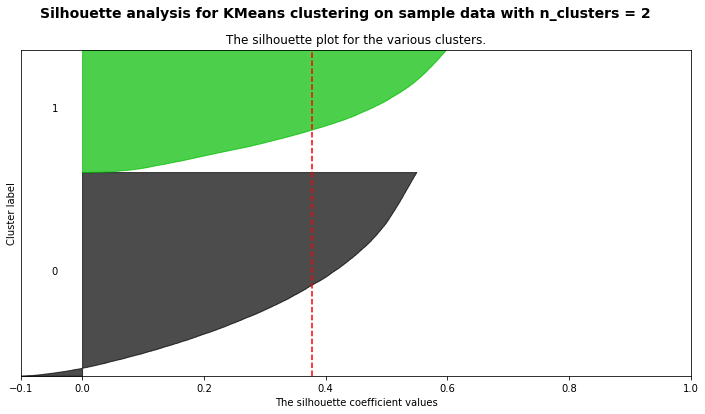

In [ ]:
'''In this cell code we evaluate the performance of our clustering algorithm.
   since clustering is an unsupervised learning technique, thus there is no 
   direct method to evaluate its performance since we dont have the ground truth
   available. The performance metric used here is called the silhouette analysis.
   It is basically a measure of how similar the members in the same cluster are
   and how different they are from the neighbour clusters.'''


fig, ax = plt.subplots(figsize=(12, 6))        #Empty figure

# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 0.5]   
ax.set_xlim([-0.1, 0.5])                               #X-axis limit
ax.set_ylim([0, len(df_train) + (n_clusters + 1) * 10])  #Y-axis limit

# Compute the silhouette score
sample_silhouette_values = silhouette_samples(PCA_components.iloc[:,:2], model_2.labels_)
# Compute the average silhouette score
silhouette_avg = silhouette_score(PCA_components.iloc[:,:2], model_2.labels_)

y_lower = 10
#For loop over respective cluster
for i in range(n_clusters):
  # Aggregate the silhouette scores for samples belonging to
  # cluster i, and sort them
  ith_cluster_silhouette_values = \
      sample_silhouette_values[model_2.labels_ == i]

  ith_cluster_silhouette_values.sort() #Sorting each cluster score
  
  #Setting limit for each cluster in y-axis
  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i
  
  #Setting color for each cluster's silhouette coefficients
  color = cm.nipy_spectral(float(i) / n_clusters) 
  ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

  # Label the silhouette plots with their cluster numbers at the middle
  ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples

#Titles for the plot
ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold');

#Printing the average silhouette score for the clusters
print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

#Saving Clusters

In [ ]:
#Separating cluster 0 and cluster 1
Cluster_0 = df_train[df_train['cluster_pred']==0]
Cluster_1 = df_train[df_train['cluster_pred']==1]

#Saving the two clusters
Cluster_0.to_csv('Cluster_0.csv')
Cluster_1.to_csv('Cluster_1.csv')